In [1]:
import numpy as np
from cellpose import plot, utils, io
import matplotlib.pyplot as plt
from skimage.measure import label, regionprops, regionprops_table
from skimage.segmentation import clear_border
from numpy.polynomial.polynomial import polyfit
import glob

In [2]:
# These pixel conversion factors are valid only for GFP-probe images.
pixelX = 2138
micronX = 212.13
pix_to_um = micronX/pixelX
# nM per unit intensity after background subtraction was calculated using Ap4 and Ap5 concentrations measued by FCS.
background = 180
# Both gave similar conversion factors. Ap4 factor is used. nM per unit intesntiy = 0.11766690610151902
bright_to_conc = 0.118
# All Sc strains are het for GFP-probes so concentrations were multiplied by 2 before plotting.
# Cdc42 and Rac1 probes all use mCherry. Current plots are preliminary and proper conversion factors have not been generated. 
# Images and cellpose masks are loaded, background is subtracted, median pixel value within cell is used for concentration of probe.
# Volume is estimated as short_axis^2 * long_axis. Concentrations in cells are binned by volume and plotted as violins. 

nM per unit intesntiy = 0.11766690610151902


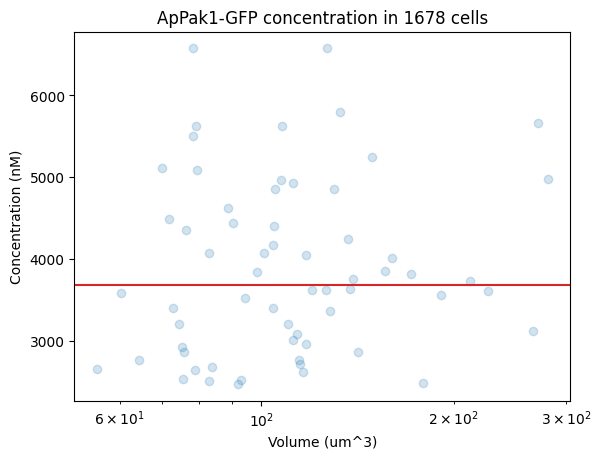

In [11]:
def get_median(m, im):
    return np.median(im)

meds = []
maxes = []
vols = []
for f in glob.glob("../data/2024_09_10-NiceImgs/Ap4*.npy"):
    dat = np.load(f, allow_pickle=True).item()
    labels = dat["masks"]
    img = io.imread(f.replace("_seg.npy", ".tif"))
    props = regionprops_table(
        labels, img,
        properties=('intensity_max', 'axis_major_length', 'axis_minor_length'),
        extra_properties=(get_median,)
        )
    meds.append(props["get_median"])
    maxes.append(props["intensity_max"])
    v = props["axis_major_length"] * props["axis_minor_length"]**2 * (4/3)*(0.5**3)*np.pi
    vols.append(v*pix_to_um**3)

meds = np.concatenate(meds)
maxes = np.concatenate(maxes)

background = 180
meds = meds - background
maxes = maxes - background

remove_dead_and_background = np.multiply(meds < np.mean(meds)+2*np.std(meds), meds > np.mean(meds)-2*np.std(meds))
meds = meds[remove_dead_and_background]
maxes = maxes[remove_dead_and_background]


vols = np.concatenate(vols)
vols = vols[remove_dead_and_background]
yeast_only = np.multiply(50 < vols, vols < 100)
print(f"nM per unit intesntiy = {108.018/np.mean(meds[yeast_only])}")
meds = meds * (108.018/np.median(meds[yeast_only])) # conversion factor based on FCS conc meas Ap4 
maxes = maxes * 0.118

is_cell_sized = vols>50 
vols = vols[is_cell_sized]
maxes = maxes[is_cell_sized]

not_cytoplasm = maxes > np.mean(maxes)+2*np.std(maxes)
vols = vols[not_cytoplasm]
maxes = maxes[not_cytoplasm]

plt.scatter(vols, maxes, alpha=0.2)
#b, m = polyfit(vols[is_cell_sized], means[is_cell_sized], 1)
plt.axhline(np.median(maxes), color="C03")
#plt.ylim(0, 500)
plt.xlabel("Volume (um^3)")
plt.ylabel("Concentration (nM)")
plt.title(f"ApPak1-GFP concentration in {len(meds)} cells")
plt.xscale("log")

nM per unit intesntiy = 0.3457734056451814


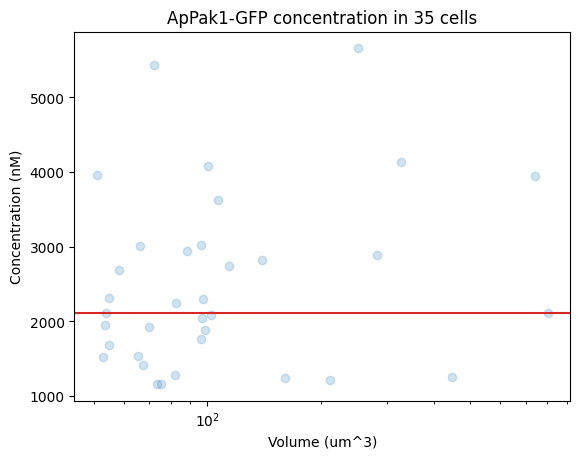

In [14]:
def get_median(m, im):
    return np.median(im)

meds = []
maxes = []
vols = []
for f in glob.glob("../data/2024_09_10-NiceImgs/Ap5*.npy"):
    dat = np.load(f, allow_pickle=True).item()
    labels = dat["masks"]
    img = io.imread(f.replace("_seg.npy", ".tif"))
    props = regionprops_table(
        labels, img,
        properties=('intensity_max', 'axis_major_length', 'axis_minor_length'),
        extra_properties=(get_median,)
        )
    meds.append(props["get_median"])
    maxes.append(props["intensity_max"])
    v = props["axis_major_length"] * props["axis_minor_length"]**2 * (4/3)*(0.5**3)*np.pi
    vols.append(v*pix_to_um**3)

meds = np.concatenate(meds)
maxes = np.concatenate(maxes)

background = 180
meds = meds - background
maxes = maxes - background

remove_dead_and_background = np.multiply(meds < np.mean(meds)+2*np.std(meds), meds > np.mean(meds)-2*np.std(meds))
meds = meds[remove_dead_and_background]
maxes = maxes[remove_dead_and_background]


vols = np.concatenate(vols)
vols = vols[remove_dead_and_background]
yeast_only = np.multiply(50 < vols, vols < 100)
print(f"nM per unit intesntiy = {108.018/np.mean(meds[yeast_only])}")
meds = meds * (108.018/np.median(meds[yeast_only])) # conversion factor based on FCS conc meas Ap4 
maxes = maxes * 0.118

is_cell_sized = vols>50 
vols = vols[is_cell_sized]
maxes = maxes[is_cell_sized]
meds = meds[is_cell_sized]

not_cytoplasm = maxes > np.mean(maxes)+2*np.std(maxes)
vols = vols[not_cytoplasm]
maxes = maxes[not_cytoplasm]
meds = meds[not_cytoplasm]

plt.scatter(vols, maxes, alpha=0.2)
#b, m = polyfit(vols[is_cell_sized], means[is_cell_sized], 1)
plt.axhline(np.median(maxes), color="C03")
#plt.ylim(0, 500)
plt.xlabel("Volume (um^3)")
plt.ylabel("Concentration (nM)")
plt.title(f"ApPak1-GFP concentration in {len(meds)} cells")
plt.xscale("log")